# A FAIRE (LOUIS) : APPLIQUER TOUS LES TRAITEMENTS EGALEMENT SUR LE JEU DE DONNEES TEST

# Chargement des bibliothèques

In [240]:
# Classique
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import os

# Import Yoann
import sys
import re
import string
!{sys.executable} -m pip install spacy
#import pandas as pd 
import re
import spacy
# !{sys.executable} -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

# géométrie/algèbre
import sympy
from sympy import symbols, Eq, solve

# NLP
#import spacy
#import re
#import string

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Editeur
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Chargement des données

In [241]:
url1 = 'https://raw.githubusercontent.com/Francois-lenne/Big-data-SIAD/main/train.csv' # le dataset est stocké dans un repo github afin d'avoir un lien dur sur la base
train = pd.read_csv(url1, sep=',') # lecture du dataframe 
train = train.sample(1000).reset_index(drop=True)
print(train.head())

     id     keyword                    location  \
0  3911  devastated                  Birmingham   
1  8691    sinkhole                         NaN   
2  8738     sinking            Rhyme Or Reason?   
3  2340    collapse            #Bummerville otw   
4   761   avalanche  London, Kent & SE England.   

                                                text  target  
0  ÛÏRichmond Coaches were devastated to hear of...       1  
1  Share Large sinkhole swallows entire pond in L...       1  
2  The #Tribe just keeps sinking everyday it seem...       1  
3  Why did I come to work today.. Literally wanna...       1  
4  Beautiful Sweet Avalanche Faith and Akito rose...       0  


In [242]:
url2 = 'https://raw.githubusercontent.com/Francois-lenne/Big-data-SIAD/main/test.csv' # le dataset est stocké dans un repo github afin d'avoir un lien dur sur la base
test = pd.read_csv(url2, sep=',') # lecture du dataframe 
test = test.sample(200).reset_index(drop=True)
print(test.head())

      id              keyword          location  \
0   5643             flooding  State College Pa   
1   2999                 dead          bristol    
2   3671              destroy           Raleigh   
3    223  airplane%20accident  inland empire ca   
4  10311               weapon          ????????   

                                                text  
0  Donate to help Myanmar Flooding victims http:/...  
1             no way can ross be dead..?? #Emmerdale  
2  When something bad happens; you have 3 choices...  
3  @god if an accident were to happen on this air...  
4  No more war.People need no any weapon.\nWe nee...  


# Analyse exploratoire

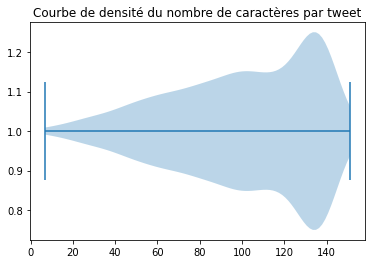

In [243]:
train['text_length'] = [len(text) for text in train['text']]
plt.violinplot(train['text_length'], vert = False)
plt.title('Courbe de densité du nombre de caractères par tweet')
plt.show()

In [244]:
train['keyword'].value_counts()

sinking                10
wrecked                10
emergency              10
burning%20buildings    10
explosion               9
                       ..
obliterated             1
war%20zone              1
epicentre               1
devastation             1
annihilated             1
Name: keyword, Length: 219, dtype: int64

In [245]:
train['location'].value_counts()

USA                      11
New York                  9
India                     5
United Kingdom            5
NYC                       5
                         ..
Leeds, UK                 1
walking the tightrope     1
laying on the bass        1
Winnipeg, Manitoba        1
Live On Webcam            1
Name: location, Length: 575, dtype: int64

#Extraction des parties des tweets


In [246]:
# Correction orthographique

# Conversion chiffres en texte

# Date

# Hashtag

# Liens hypertextes

# Contenu textuel

# Noms profils

# Enrichissement de la localisation

In [247]:
# Récupération des hashtag

def recupHashtag(text):
    reg = r"#(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
        ge = p.findall(text)
        ge_join = ' '.join(ge)
        return ge_join

def recupHashtagBinaire(text):
    rep = '0'
    reg = r"#(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
      rep = '1'
    return rep


In [248]:
def recupName(text):
    reg = r"@(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
        ge = p.findall(text)
        ge_join = ' '.join(ge)
        return ge_join

def recupNameBinaire(text):
    rep = '0'
    reg = r"@(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
      rep = '1'
    return rep
        


In [249]:
def recupDate(text):
    reg = r"([A-Za-z]{3})\s(\d{1,2}),\s(\d{4})"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
        ge = p.findall(text)
        return ge

def recupDateBinaire(text):
    rep = '0'
    reg = r"([A-Za-z]{3})\s(\d{1,2}),\s(\d{4})"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
      rep = '1'
    return rep
    


In [250]:
def getChemin(text):
    reg1 = r'(https?:\/\/[^\s]+)'
    reg2 = r'(https?)://([^:/]+)(?::(\d+))?(/[^?]*)?(\?[^#]*)?(#.*)?'
    p = re.compile(reg1)
    check = re.search(reg1,text)
    if check is not None:
        ge = p.findall(text)
        for val in ge:
            match = re.search(reg2,val)
            if match:
                rt = match.group(4)
            return rt

def getCheminBinaire(text):
    rep = '0'
    reg1 = r'(https?:\/\/[^\s]+)'
    p = re.compile(reg1)
    check = re.search(reg1,text)
    if check is not None:
      rep = '1'
    return rep

In [251]:
def getLocation(text):
    global nlp
    save = []
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            save.append(ent.text)
    return save

In [252]:
def getLocationBinaire(text):
    rep = "0"
    global nlp
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            rep = "1"
    return rep

In [269]:
train['hashtags'] = train['text'].apply(recupHashtag)
train['hashtags_b'] = train['text'].apply(recupHashtagBinaire)

train['names'] = train['text'].apply(recupName)
train['names_b'] = train['text'].apply(recupNameBinaire)

train['dates'] = train['text'].apply(recupDate)
train['dates_b'] = train['text'].apply(recupDateBinaire)

train['locations'] = train['text'].apply(getLocation)
train['locations_b'] = train['text'].apply(getLocationBinaire)

train['rt_path'] = train['text'].apply(getChemin)
train['rt_path_b'] = train['text'].apply(getCheminBinaire)

In [270]:
test['hashtags'] = test['text'].apply(recupHashtag)
test['hashtags_b'] = test['text'].apply(recupHashtagBinaire)

test['names'] = test['text'].apply(recupName)
test['names_b'] = test['text'].apply(recupNameBinaire)

test['dates'] = test['text'].apply(recupDate)
test['dates_b'] = test['text'].apply(recupDateBinaire)

test['locations'] = test['text'].apply(getLocation)
test['locations_b'] = test['text'].apply(getLocationBinaire)

test['rt_path'] = test['text'].apply(getChemin)
test['rt_path_b'] = test['text'].apply(getCheminBinaire)

In [271]:
train

,id,keyword,location,text,target,text_length,hashtags,names,dates,hashtags_b,...,locations_b,rt_path,rt_path_b,text_CLEAN,text_CLEAN_LMT,text_CLEAN_LMT_TOKEN,text_CLEAN_LMT_TOKEN_WSW,text_CLEAN_LMT_TOKEN_WSW_BIGRAMS,text_CLEAN_LMT_WSW_BIGRAMS,text_CLEAN_LMT_WSW_BIGRAMS_FILTERED
0,3911,devastated,Birmingham,ÛÏRichmond Coaches were devastated to hear of...,1,139,None,None,None,0,...,0,/sHKiMonMlw,1,ûïrichmond coaches were devastated to hear of...,ûïrichmond coach be devastate to hear of the ...,"[ûïrichmond, coach, be, devastate, to, hear, ...","[ûïrichmond, coach, devastate, hear, death, s...","[ûïrichmond, coach, devastate, hear, death, s...",ûïrichmond coach devastate hear death second ...,ûïrichmond coach devastate hear death second ...
1,8691,sinkhole,NaN,Share Large sinkhole swallows entire pond in L...,1,109,YoNews,None,None,1,...,1,/HvBJ30aj9s,1,share large sinkhole swallows entire pond in l...,share large sinkhole swallow entire pond in lo...,"[share, large, sinkhole, swallow, entire, pond...","[share, large, sinkhole, swallow, entire, pond...","[share, large, sinkhole, swallow, entire, pond...",share large sinkhole swallow entire pond lownd...,share large sinkhole swallow entire pond lownd...
2,8738,sinking,Rhyme Or Reason?,The #Tribe just keeps sinking everyday it seem...,1,102,Tribe,None,None,1,...,0,None,0,the just keeps sinking everyday it seems faste...,the just keep sink everyday it seem fast as fo...,"[the, just, keep, sink, everyday, it, seem, fa...","[sink, everyday, fast, year, titanic, disaster]","[sink, everyday, fast, year, titanic, disaster]",sink everyday fast year titanic disaster,sink everyday fast year titanic disaster
3,2340,collapse,#Bummerville otw,Why did I come to work today.. Literally wanna...,1,69,None,None,None,0,...,0,None,0,why did i come to work today literally wanna c...,why do I come to work today literally wanna co...,"[why, do, I, come, to, work, today, literally,...","[come, work, today, literally, wanna, collapse...","[come, work, today, literally, wanna, collapse...",come work today literally wanna collapse exhau...,come work today literally wanna collapse exhau...
4,761,avalanche,"London, Kent & SE England.",Beautiful Sweet Avalanche Faith and Akito rose...,0,131,weddinghour,None,None,1,...,0,/RaqUpzFkJY,1,beautiful sweet avalanche faith and akito rose...,beautiful sweet avalanche faith and akito rose...,"[beautiful, sweet, avalanche, faith, and, akit...","[beautiful, sweet, avalanche, faith, akito, ro...","[beautiful, sweet, avalanche, faith, akito, ro...",beautiful sweet avalanche faith akito rose lot...,beautiful sweet avalanche faith akito rose lot...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2248,chemical%20emergency,NaN,Emergency 4 Harbor City Mod v4.5.2 #6 Chemical...,1,109,6,YouTube,None,1,...,1,/uLuPxYzJwV,1,emergency harbor city mod v chemical fire in r...,emergency harbor city mod v chemical fire in r...,"[emergency, harbor, city, mod, v, chemical, fi...","[emergency, harbor, city, mod, chemical, fire,...","[emergency, harbor, city, mod, chemical, fire,...",emergency harbor city mod chemical fire reside...,emergency harbor city mod chemical fire reside...
996,8581,screams,"Ontario, Canada",Aw man. 'Apollo Crews' just screams 'we can't ...,0,120,None,None,None,0,...,0,None,0,aw man apollo crews just screams we can t thin...,aw man apollo crew just scream we can t think ...,"[aw, man, apollo, crew, just, scream, we, can,...","[man, apollo, crew, scream, think, black, guy,...","[man, apollo, crew, scream, think, black, guy,...",man apollo crew scream think black guy quick mash,man apollo crew scream think black guy quick mash
997,10666,wounds,Cape Town,and I thought my surgical wounds were healed!!...,0,84,None,None,None,0,...,0,None,0,and i thought my surgical wounds were healed t...,and I think my surgical wound be heal this wea...,"[and, I, think, my, surgical, wound, be, heal,...","[think, surgical, wound, heal, 

In [272]:
pd.crosstab(train.rt_path, train.target, margins=True, margins_name="Total").sort_values('Total', ascending=False)

target,0,1,Total
rt_path,,,
Total,227,261,488
/k5KnNwugwT,1,0,1
/jLu2J5QS8U,0,1,1
/jDDNhmrmMJ,1,0,1
/in8LyS7v5l,0,1,1
...,...,...,...
/LTmgdP6Jaf,0,1,1
/LRTU8Rwn2f,0,1,1
/LMrKgPOrcF,1,0,1


#Nettoyage du contenu textuel des tweets

## Prenettoyage

In [273]:
# Expression régulières : ponctuation, chiffres, accents, majuscules, espaces en trop …
import re
def preprocessing(text):
    text = str(text)

    # Harmonisation - mise en minuscule
    text = text.lower()

    # Gestion des accents et ponctuations
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub("\d+", " ", text) # normalisation nombres
    text = re.sub('[éèê]', "e", text) # retrait accents
    text = re.sub("[.,;:!?]", " ", text)
    text = re.sub("[|{}\[\]()«»/]", " ", text)
    text = re.sub("[“”]", " ", text)
    text = re.sub("'", " ", text)
    text = re.sub("’", " ", text)
    text = re.sub('"', " ", text)
    text = re.sub('[+-]', " ", text)
    text = re.sub('[=*/]', " ", text)
    text = re.sub("ô", "o", text)
    text = re.sub("°", "", text)

    # Gestion des symboles
    text = re.sub("[€%$£]", "", text)

    # Gestions des retours à la ligne ou fin de lignes
    text = re.sub('\r\n', " ", text)
    text = re.sub('\n', " ", text)

    # Gestion des espaces
    text = re.sub('\s+', " ", text) # espaces en trop
    text = text.rstrip(" ") # à droite
    text = text.lstrip(" ") # à gauche

    return text

In [274]:
train['text_CLEAN'] = train['text'].apply(lambda x: preprocessing(x))
test['text_CLEAN'] = test['text'].apply(lambda x: preprocessing(x))
train[['text','text_CLEAN']].sample(10)

,text,text_CLEAN
812,I wish I could get Victoria's Secret on front....,i wish i could get victoria s secret on front ...
709,@FNAF_TalkMC *stands there engulfed in the fir...,stands there engulfed in the fire smiling
29,@cameronhigdon34 I can't drown my demons they ...,i can t drown my demons they know how to swim
558,Arnhem Weather - &lt;p&gt;An unrelenting and d...,arnhem weather &lt p&gt an unrelenting and dan...
848,Wreckage 'Conclusively Confirmed' as From MH37...,wreckage conclusively confirmed as from mh mal...
643,#KCA #VoteJKT48ID DUCKVILLELOL: Burning flips ...,duckvillelol burning flips the table and says ...
932,@Jones94Kyle now I've said all this he's dead ...,now i ve said all this he s dead and no one el...
950,literally just sunk in we got backty school in...,literally just sunk in we got backty school in...
802,Update: The police seemed like nice enough peo...,update the police seemed like nice enough peop...
90,ng2x5 mhtw4fnet\n\nWatch Michael Jordan absolu...,ng x mhtw fnet watch michael jordan absolutely...


## Lemmatisation / Stemmisation

In [275]:
# !pip install nltk
import nltk
# nltk.download('all')

In [276]:
# !pip install -U spacy
# !pip install -U spacy-lookups-data
# !python -m spacy download en_core_web_sm

In [277]:
import tqdm
def Lemmatization(train,texts):
    pbar = tqdm.tqdm(total=train.shape[0])
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc: 
            new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
        pbar.update(1) # actualise la progress bar
    return (texts_out)
    pbar.close()

train['text_CLEAN_LMT'] = Lemmatization(train,train['text_CLEAN'])
test['text_CLEAN_LMT'] = Lemmatization(test,test['text_CLEAN'])
train[['text_CLEAN','text_CLEAN_LMT']].head()

100%|██████████| 200/200 [00:01<00:00, 114.45it/s]


,text_CLEAN,text_CLEAN_LMT
0,ûïrichmond coaches were devastated to hear of...,ûïrichmond coach be devastate to hear of the ...
1,share large sinkhole swallows entire pond in l...,share large sinkhole swallow entire pond in lo...
2,the just keeps sinking everyday it seems faste...,the just keep sink everyday it seem fast as fo...
3,why did i come to work today literally wanna c...,why do I come to work today literally wanna co...
4,beautiful sweet avalanche faith and akito rose...,beautiful sweet avalanche faith and akito rose...


In [278]:
# Pour cette partie du traitement, les tweets doivent être décomposés en mots
def tokenize(text):
    text_split = [word for word in text.split()]
    return text_split

train['text_CLEAN_LMT_TOKEN'] = train['text_CLEAN_LMT'].apply(lambda x: tokenize(x))
test['text_CLEAN_LMT_TOKEN'] = test['text_CLEAN_LMT'].apply(lambda x: tokenize(x))
train[['text_CLEAN_LMT','text_CLEAN_LMT_TOKEN']].head()

,text_CLEAN_LMT,text_CLEAN_LMT_TOKEN
0,ûïrichmond coach be devastate to hear of the ...,"[ûïrichmond, coach, be, devastate, to, hear, ..."
1,share large sinkhole swallow entire pond in lo...,"[share, large, sinkhole, swallow, entire, pond..."
2,the just keep sink everyday it seem fast as fo...,"[the, just, keep, sink, everyday, it, seem, fa..."
3,why do I come to work today literally wanna co...,"[why, do, I, come, to, work, today, literally,..."
4,beautiful sweet avalanche faith and akito rose...,"[beautiful, sweet, avalanche, faith, and, akit..."


## Retrait des stopwords

In [279]:
nlp = spacy.load('en_core_web_sm')
stopwords = spacy.lang.en.stop_words.STOP_WORDS

stopwords = [word.lower() for word in stopwords]

# conservation de certains stopwords
liste = [
    # mots à conserver (à exclure de la liste des stopwords par défaut)
]

stopwords = [word for word in stopwords if word not in liste]

In [280]:
def remove_stopwords(text):
    text = [word for word in text if (len(word) > 2) and (word not in stopwords)]
    return text

train['text_CLEAN_LMT_TOKEN_WSW'] = train['text_CLEAN_LMT_TOKEN'].apply(lambda x: remove_stopwords(x))
test['text_CLEAN_LMT_TOKEN_WSW'] = test['text_CLEAN_LMT_TOKEN'].apply(lambda x: remove_stopwords(x))
train[['text_CLEAN_LMT_TOKEN','text_CLEAN_LMT_TOKEN_WSW']].head()

,text_CLEAN_LMT_TOKEN,text_CLEAN_LMT_TOKEN_WSW
0,"[ûïrichmond, coach, be, devastate, to, hear, ...","[ûïrichmond, coach, devastate, hear, death, s..."
1,"[share, large, sinkhole, swallow, entire, pond...","[share, large, sinkhole, swallow, entire, pond..."
2,"[the, just, keep, sink, everyday, it, seem, fa...","[sink, everyday, fast, year, titanic, disaster]"
3,"[why, do, I, come, to, work, today, literally,...","[come, work, today, literally, wanna, collapse..."
4,"[beautiful, sweet, avalanche, faith, and, akit...","[beautiful, sweet, avalanche, faith, akito, ro..."


## Bigrammes - Trigrammes

S'effectue sur donneés tokenizées

Astuce : la construction des bigrammes peut s'effectuer en ignorant les stopwords grâce au paramètre "connector_words". Du coup on précise d'abord la liste des stopwords afin que ces stopwords ne se retrouvent pas dans des bigrammes.

In [281]:
import gensim

### TRAIN

data_words_train = train['text_CLEAN_LMT_TOKEN_WSW'].values.tolist()
data_words_train

# Modèles Bigrammes/Trigrammes
bigram = gensim.models.Phrases(data_words_train, min_count=5, threshold=0,
                              #  connector_words=stopwords,
                               scoring = 'npmi')
trigram = gensim.models.Phrases(bigram[data_words_train], threshold=0,
                              #  connector_words=stopwords,
                                scoring = 'npmi')

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Fonctions retournant les bigrammes/trigrammes
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Crée les bigrammes
data_words_train_bigrams = make_bigrams(data_words_train)
train['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'] = data_words_train_bigrams
train['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'][:5]


### TEST

data_words_test = test['text_CLEAN_LMT_TOKEN_WSW'].values.tolist()
data_words_test

# Modèles Bigrammes/Trigrammes
bigram = gensim.models.Phrases(data_words_test, min_count=5, threshold=0,
                              #  connector_words=stopwords,
                               scoring = 'npmi')
trigram = gensim.models.Phrases(bigram[data_words_test], threshold=0,
                              #  connector_words=stopwords,
                                scoring = 'npmi')

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Crée les bigrammes
data_words_test_bigrams = make_bigrams(data_words_test)
test['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'] = data_words_test_bigrams
test['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'][:5]

0            [donate, help, myanmar, flooding, victim]
1                                    [way, ross, dead]
2    [bad, happen, choice, let, define, destroy, le...
3    [accident, happen, airplane, idc, rest, luggag...
4      [war, people, need, weapon, need, world, peace]
Name: text_CLEAN_LMT_TOKEN_WSW_BIGRAMS, dtype: object

## Detokenization

In [282]:
def detokenize_text(txt):
    txt = ' '.join([word for word in txt])
    return txt

train['text_CLEAN_LMT_WSW_BIGRAMS'] = train['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'].apply(lambda x: detokenize_text(x))
test['text_CLEAN_LMT_WSW_BIGRAMS'] = test['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'].apply(lambda x: detokenize_text(x))
train[['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS','text_CLEAN_LMT_WSW_BIGRAMS']].head()

,text_CLEAN_LMT_TOKEN_WSW_BIGRAMS,text_CLEAN_LMT_WSW_BIGRAMS
0,"[ûïrichmond, coach, devastate, hear, death, s...",ûïrichmond coach devastate hear death second ...
1,"[share, large, sinkhole, swallow, entire, pond...",share large sinkhole swallow entire pond lownd...
2,"[sink, everyday, fast, year, titanic, disaster]",sink everyday fast year titanic disaster
3,"[come, work, today, literally, wanna, collapse...",come work today literally wanna collapse exhau...
4,"[beautiful, sweet, avalanche, faith, akito, ro...",beautiful sweet avalanche faith akito rose lot...


# Modélisation

## Feature engineering

Ici la sélection de variable consiste à conserver ou non certains mots.

On peut supprimer les mots dont l'occurence est si rare que leur conservation serait source d'overfitting.

Pour choisir ces mots, on peut utiliser le TF_Itrain, une grandeur qui pondère la fréquence d'un mot au sein d'un texte par rapport à sa fréquence dans un ensemble de texte.

En résumé, un mot fréquent dans un texte mais qui l'est également dans tous les textes sera pénalisé, alors qu'un mot fréquent uniquement dans un texte sera favorisé. Cela permet de mettre en avant les mots qui aident à distinguer les textes entre eux, et donc contribuent à une meilleure classification.

In [283]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Création d'une table dont les colonnes sont les mots et les données sont les valeurs TF-Itrain
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(train['text_CLEAN_LMT_WSW_BIGRAMS'].astype('U'))
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()

train_Tfidf = pd.DataFrame(dense, columns=feature_names)

# Détection des mots dont la valeur TF-Itrain est peu signifiante au sein du corpus

## Dataframe contenant chaque mot et leur TF-Itrain moyen
mean_Tfidf = []
for feature in train_Tfidf.columns.values:
    mean_Tfidf.append(np.mean(train_Tfidf[feature]))
    
train_mean_Tfidf = pd.DataFrame({'word': train_Tfidf.columns.values,'mean_Tfidf': mean_Tfidf})

## Liste contenant les mots dont le TF-Itrain moyen est inférieur à un seuil prédéfini
threshold = np.percentile(train_mean_Tfidf['mean_Tfidf'],10) # on retire les X % plus bas en terme de TF-Itrain
features_to_delete = train_mean_Tfidf['word'].loc[train_mean_Tfidf['mean_Tfidf'] < threshold]

## Suppression de ces mots des texts. On met à jour la liste des stopwords avec les mots rares que l'on souhaite exclure.
for feature in features_to_delete:
    stopwords.extend(feature)

# On tokenize, on supprime les stopwords, et on détokenize
train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'] = [text.split() for text in train['text_CLEAN_LMT_WSW_BIGRAMS'].astype(str)]  # le as.type(str) convertit en texte car apres nettoyage, certains tweets ne contiennent parfois plus que des numéros 
train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'] = train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'].apply(remove_stopwords)
train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'] = train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'].apply(lambda x: detokenize_text(x))

# Affichage du nombre de features final
print('total de feature =', train_Tfidf.shape[1])
print(features_to_delete)

# Création d'un dataframe contenant les mots en tant que features TF-IDF
train_word_features = vectorizer.fit_transform(train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'])
feature_names = vectorizer.get_feature_names_out()
dense = train_word_features.todense()
train_word_features = pd.DataFrame(dense, columns=feature_names)

##################################################################################################

# LE NOMBRE DE FEATURE DONNE UNE IDEE DE LA COMPLEXITE DU MODELE
# IL FAUT LE REDUIRE AU STRICT NECESSAIRE POUR GARANTIR UN BON POUVOIR DE GENERALISATION

##################################################################################################

total de feature = 3201
7         abcnew
8           abia
34      activity
52          afte
56           age
          ...   
3158         www
3164      yehuda
3165      yellow
3186          ââ
3197        ûïwe
Name: word, Length: 316, dtype: object


##GridSearch

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 

from sklearn.model_selection import GridSearchCV

X_train = pd.concat([train_word_features, train[['hashtags_b','names_b','rt_path_b','locations_b']]], axis='columns')

y_train = train['target']


#clf = RandomForestClassifier(n_estimators=5000, random_state=0)
pipe = Pipeline([
    ("TdIdf",TfidfTransformer()),
    ("scaler", StandardScaler(with_mean=False)), # mean = True ne fonctionne pas avec une sparse matrix (TD-IDF)

    # Modèle testé en premier (n'importe lequel)
    ("classifier", LogisticRegression(random_state=0))
    #("clf",clf)
    
])

param_grid = [
    # Régression Logistique (one vs rest)
    #{'classifier': [RandomForestClassifier(random_state=0)],
    # 'classifier__C': [1,10,100]},
    # {'classifier': [LogisticRegression(random_state=0)],
    #  'classifier__C': [1,10,100, 1000, 10000]},

    # Support Vector Machine
    {'classifier': [SVC(kernel='rbf', random_state=0, probability = True)],
     'classifier__C': [1,10,100]},
    
    # {'classifier': [MLPClassifier(random_state = 0,
    #                         max_iter = 10,
    #                         alpha = 1,
    #                         hidden_layer_sizes=(100,))]},
    #  {'classifier': [RandomForestClassifier(n_estimators=100, random_state=0)]},
    #  {'classifier': [AdaBoostClassifier(n_estimators=100, random_state=0)]},
    #  {'classifier': [GradientBoostingClassifier(n_estimators=100, random_state=0)]},
             ]

grid = GridSearchCV(pipe, param_grid, verbose = 2, cv = 5) # verbose pour l'affichage du temps de traitement
grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=1; total time=   2.5s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=1; total time=   1.2s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=1; total time=   1.2s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=1; total time=   1.2s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=1; total time=   1.2s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=10; total time=   1.2s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=10; total time=   1.2s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=10; total time=   1.2s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=10; total time=   1.2s
[CV] END classifier=SVC(probability=True, random_state=0), classifier__C=10; tota

## Evaluation

In [286]:
print('best model : ', grid.best_params_)
print('best cv score : ', grid.best_score_)

best model :  {'classifier': SVC(C=10, probability=True, random_state=0), 'classifier__C': 10}
best cv score :  0.71


## Récupération des prédictions

In [288]:
test_word_features = vectorizer.transform(test['text_CLEAN_LMT_WSW_BIGRAMS'].values.astype(str))
feature_names = vectorizer.get_feature_names_out()
dense = test_word_features.todense()
test_word_features = pd.DataFrame(dense, columns=feature_names)

X_test = pd.concat([test_word_features, test[['hashtags_b','names_b','rt_path_b','locations_b']]], axis='columns')

test_predictions_tab = pd.DataFrame(grid.predict(X_test)) \
                            .reset_index(drop=True).rename(columns={0 : 'target_prédite'})

test_probas_tab = pd.DataFrame(grid.predict_proba(X_test), columns=[grid.classes_])

test_results = pd.concat([test_predictions_tab,
                          test_probas_tab],
                          axis=1).dropna() # probas et prédictions

test_results.dropna().to_csv('test_results.csv',sep=';',encoding='utf-16')

test_results

,target_prédite,"(0,)","(1,)"
0,1,0.318924,0.681076
1,0,0.949823,0.050177
2,0,0.827240,0.172760
3,0,0.592467,0.407533
4,1,0.200067,0.799933
...,...,...,...
195,1,0.017019,0.982981
196,0,0.922215,0.077785
197,0,0.832594,0.167406
198,0,0.905846,0.094154
